In [1]:


import pandas as pd
from networkx import neighbors

In [17]:
from pyecharts.charts import Bar,Page,Tab
from pyecharts import options as opts
from pyecharts.globals import ThemeType

In [2]:

from pyecharts.charts import Bar, Line,Scatter,Timeline,Grid,Pie
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType 
data = pd.read_csv('./修改后按年分的文件.csv')
dp3=data.groupby('车辆级别')['行驶距离(万公里)'].sum().reset_index()
dp4 = data.groupby('车辆级别')['price'].mean().reset_index()
dp4['price'] = dp4['price'].round(2)
dp5 = pd.merge(dp3,dp4,on='车辆级别').values.tolist()
itemstyle = {
    'normal': {
        'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [
          { offset: 0, color: 'rgb(255, 191, 0)' },
          { offset: 1, color: 'rgb(224, 62, 76)' }
        ],)"""),
        'barBorderRadius': [10,10,10,10],      #  柱子的四个角圆角设计
        'shadowColor':'rgba(108,80,243,0.9)', # 阴影的颜色
        'shadowBlur':20, # 阴影的宽度
    }
}
itemstyle1 = {
    'normal': {
        'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [
          { offset: 0, color: 'rgb(128, 255, 165)' },
          { offset: 1, color: 'rgb(1, 191, 236)' }
        ],)"""),
        'barBorderRadius': [10,10,10,10],      #  柱子的四个角圆角设计
        'shadowColor':'rgba(108,80,243,0.9)', # 阴影的颜色
        'shadowBlur':20, # 阴影的宽度
    }
}
bar = (Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK,bg_color='#080b30'))
      .add_xaxis([i[0] for i in dp5])
       .add_yaxis('行驶距离（万公里）',[i[1] for i in dp5],yaxis_index=0,
                 itemstyle_opts=itemstyle,)
       .add_yaxis('平均价格',[i[2] for i in dp5],yaxis_index=1,
                 itemstyle_opts=itemstyle1)
        .extend_axis(
            yaxis=opts.AxisOpts(
                name='平均价格',interval=10,) )
        .set_global_opts(
            title_opts=opts.TitleOpts(title='不同车辆级别基本情况对比',pos_left = 'center'),
            xaxis_opts=opts.AxisOpts(splitline_opts={'show':False}),
            yaxis_opts=opts.AxisOpts(name='行驶距离（万公里）',splitline_opts={'show':False}),
            legend_opts=opts.LegendOpts(pos_top='7%'),
            tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="shadow"),
        )
       .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
      )

# bar.render('bar3.html')

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\whole\\bar3.html'

In [3]:
data = pd.read_csv('./data/二手车整理数据完整.csv')
dp1 = data.groupby('year')['行驶距离(万公里)'].sum().reset_index()
dp11 = data['year'].value_counts().reset_index()
dp111=pd.merge(dp1,dp11,on='year')
dp111['mean'] = (dp111['行驶距离(万公里)'] / dp111['count']).round(2)
dp111 = dp111.values.tolist()

In [4]:
itemstyle2 = {
    'normal': {
        'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 1, 1, [
          { offset: 0, color: 'rgb(40, 141, 125)' },
          { offset: 1, color: 'rgb(199, 229, 227)' }
        ],)"""),
        'barBorderRadius': [20,20,20,20],      #  柱子的四个角圆角设计
        'shadowColor':'rgba(108,80,243,0.9)', # 阴影的颜色
        'shadowBlur':5, # 阴影的宽度
        'width': 4,
    }
}
itemstyle1 = {
    'normal': {
        'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [
            {offset: 0, color: 'rgba(255, 0, 0, 1)'},
            {offset: 1, color: 'rgba(0, 255, 0, 1)'}
        ], false)"""),
        'lineStyle': {
            'width': 4,
            'type': 'solid',
            'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [
                {offset: 0, color: 'rgba(255, 0, 0, 0.5)'},
                {offset: 1, color: 'rgba(0, 255, 0, 0.5)'}
            ], false)"""),
        },
        'borderColor': 'rgba(0, 0, 0, 0.5)',
        'borderWidth': 8,
        'shadowColor': 'rgba(0, 0, 0, 0.4)',
        'shadowBlur': 10,
        'shadowOffsetY': 10,
    }
}

In [5]:
from pyecharts.charts import Bar, Line,Scatter
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType 
bar = Bar()
bar.add_xaxis([i[1] for i in dp111])
bar.add_yaxis('车辆数量',[i[2] for i in dp111],yaxis_index=0,
              itemstyle_opts=itemstyle2,
              label_opts=opts.LabelOpts(formatter='{c}辆',color='auto') 
             )
bar.extend_axis(
    yaxis=opts.AxisOpts(name='平均行驶距离(万公里)',position='right',
        axislabel_opts=opts.LabelOpts(formatter="{value}"),
        splitline_opts=opts.SplitLineOpts(is_show=False),
        axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='black')))
)
bar.set_global_opts(title_opts=opts.TitleOpts(title='不同年份车辆数量与平均行驶距离',pos_left='center',pos_top='5%'),
                    tooltip_opts=opts.TooltipOpts(trigger='axis', axis_pointer_type='cross'),
                    legend_opts=opts.LegendOpts(pos_top='10%'),
                    xaxis_opts=opts.AxisOpts(name='年份',splitline_opts={'show':False},name_location='middle',name_gap=26,
                                            axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='black'))),
                    yaxis_opts=opts.AxisOpts(
                        name='车辆数量',
                        splitline_opts=opts.SplitLineOpts(is_show=False),
                        axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='black'))
                    )              
)

line = (Line()
        .add_xaxis([i[0] for i in dp111])
        .add_yaxis("平均行驶距离(万公里)",[i[3] for i in dp111], yaxis_index=1,z_level=2,
                   itemstyle_opts=itemstyle1,
                    is_smooth=True, is_symbol_show=False,
                   linestyle_opts=opts.LineStyleOpts(width=2, opacity=0.8) 
            )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
       )

bar.overlap(line)

In [6]:
data['上牌时间'] = pd.to_datetime(data['上牌时间'])
data['年检到期'] = pd.to_datetime(data['年检到期'])
data['保险到期'] = pd.to_datetime(data['保险到期'])
line = (Line(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
   .add_xaxis(data['上牌时间'].dt.strftime('%Y-%m-%d').tolist())
   .add_yaxis("上牌时间", data['上牌时间'].tolist(), is_smooth=True,
               label_opts=opts.LabelOpts(is_show=False))
   .add_xaxis(data['年检到期'].dt.strftime('%Y-%m-%d').tolist())
   .add_yaxis("年检到期", data['年检到期'].tolist(), is_smooth=True,
               label_opts=opts.LabelOpts(is_show=False))
   .add_xaxis(data['保险到期'].dt.strftime('%Y-%m-%d').tolist())
   .add_yaxis("保险到期", data['保险到期'].tolist(), is_smooth=True,
               label_opts=opts.LabelOpts(is_show=False))
   .set_global_opts(
        title_opts=opts.TitleOpts(title='随时间变化，上牌时间，年检到期时间，保险到期时间的变化'),
        tooltip_opts=opts.TooltipOpts(trigger='axis'),
        xaxis_opts=opts.AxisOpts(type_='time'),
        yaxis_opts=opts.AxisOpts(type_='time'),
        datazoom_opts=[opts.DataZoomOpts()],
        toolbox_opts=opts.ToolboxOpts(is_show=True)
    ))

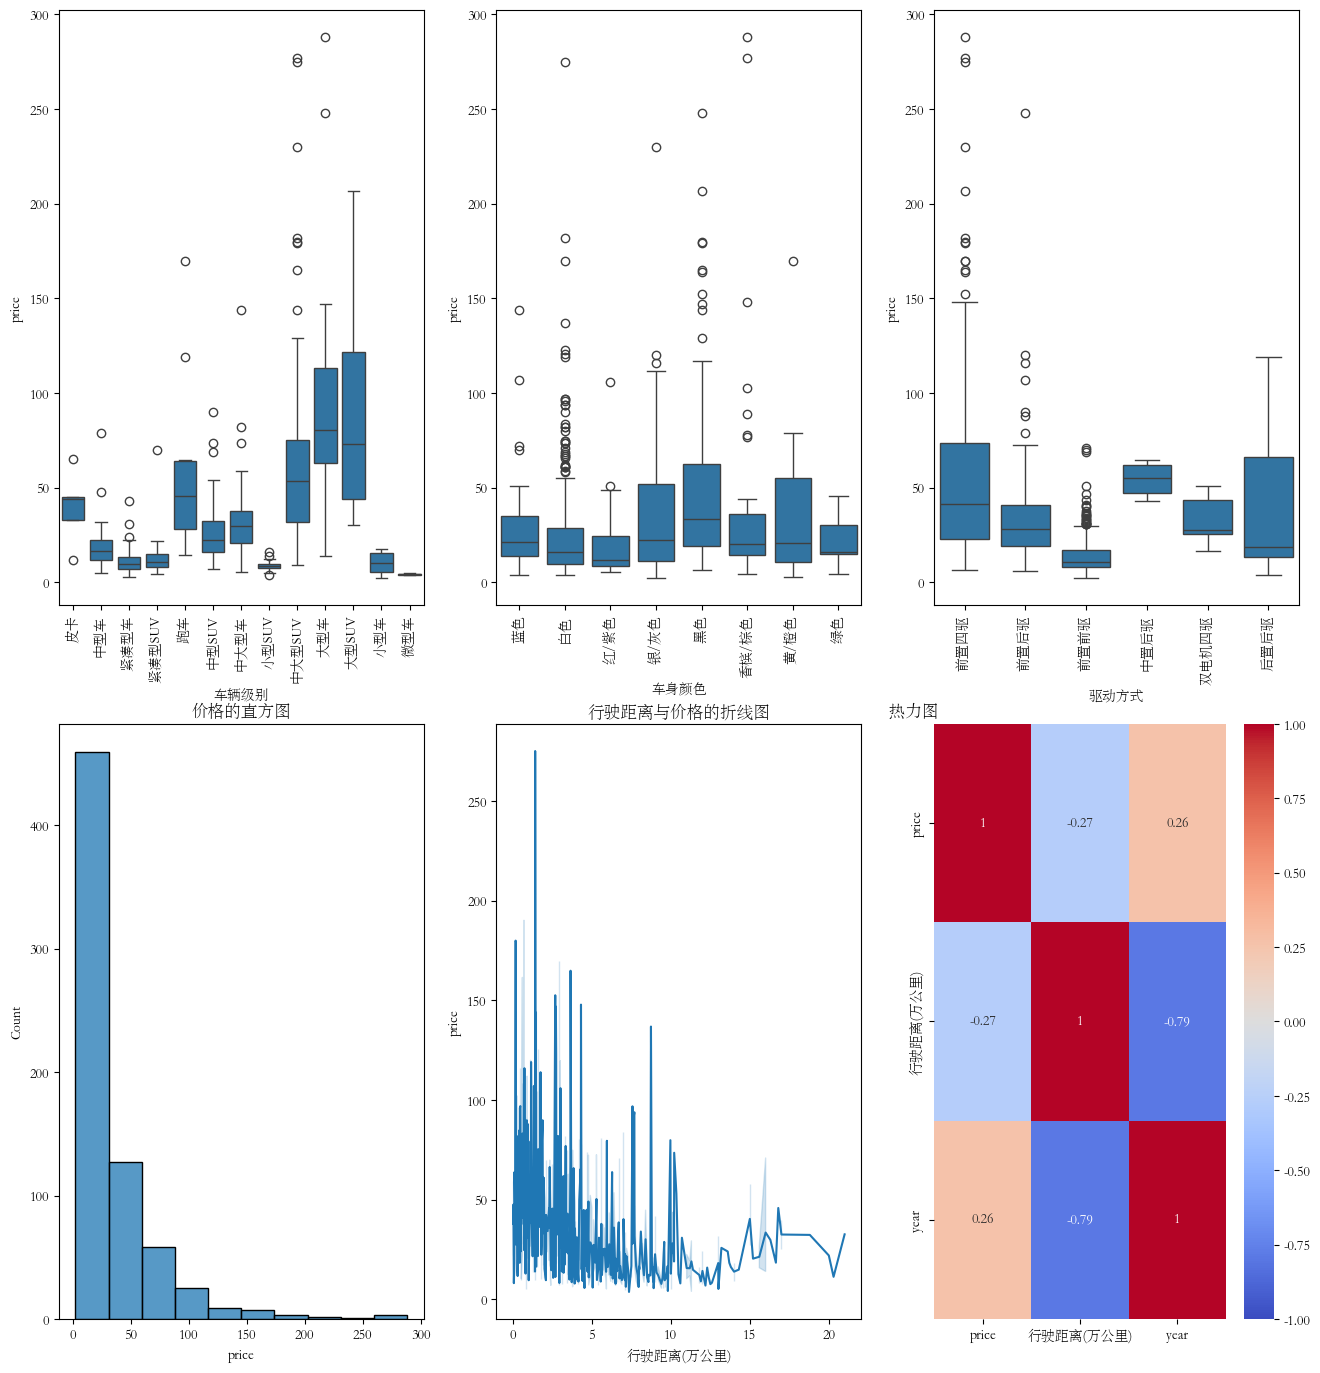

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv('./data/二手车上牌数据处理.csv')
data['出厂日期'] = pd.to_datetime(data['出厂日期'], format='%Y')
plt.rcParams['font.sans-serif'] = 'STsong'
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2,3, figsize=(16,17))

sns.boxplot(x='车辆级别', y='price', data=data, ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)
sns.boxplot(x='车身颜色', y='price', data=data, ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)
sns.boxplot(x='驱动方式', y='price', data=data, ax=axes[0,2])
axes[0,2].tick_params(axis='x', rotation=90)

plt.title('箱线图',fontsize=16,y=2.22,x=-0.1)

sns.lineplot(x='行驶距离(万公里)', y='price', data=data, ax=axes[1,1])
axes[1,1].set_title('行驶距离与价格的折线图')
sns.histplot(data['price'], bins=10, kde=False, ax=axes[1,0])
axes[1,0].set_title('价格的直方图')
# # 热力图
data_pair = data[['price','行驶距离(万公里)', 'year']].corr().round(2)
sns.heatmap(data_pair, annot=True, cmap='coolwarm', vmin=-1, vmax=1,ax=axes[1,2]).set_title('    热力图')


plt.savefig('./result/box6(1).png')

In [9]:
from pyecharts.charts import Page
page = Page()
page.add(bar,line)
page.render('result/page2.html')

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\whole\\result\\page2.html'

In [6]:
from pyecharts.commons.utils import JsCode

In [3]:
data =  pd.read_csv("./data/二手车上牌数据处理.csv",index_col=0)

In [3]:
data = pd.read_csv('./data/修改后按年分的文件.csv')

In [4]:
dp3=data.groupby('车辆级别')['行驶距离(万公里)'].sum().reset_index()

In [9]:
dp4 = data.groupby('车辆级别')['price'].mean().reset_index()
dp4['price'] = - dp4['price'].round(2)
dp5 = pd.merge(dp3,dp4,on='车辆级别').values.tolist()

In [10]:
itemstyle = {
    'normal': {
        'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [
          { offset: 0, color: 'rgb(255, 191, 0)' },
          { offset: 1, color: 'rgb(224, 62, 76)' }
        ],)"""),
        'barBorderRadius': [10,10,10,10],      #  柱子的四个角圆角设计
        'shadowColor':'rgba(108,80,243,0.9)', # 阴影的颜色
        'shadowBlur':20, # 阴影的宽度
    }
}
itemstyle1 = {
    'normal': {
        'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [
          { offset: 0, color: 'rgb(128, 255, 165)' },
          { offset: 1, color: 'rgb(1, 191, 236)' }
        ],)"""),
        'barBorderRadius': [10,10,10,10],      #  柱子的四个角圆角设计
        'shadowColor':'rgba(108,80,243,0.9)', # 阴影的颜色
        'shadowBlur':20, # 阴影的宽度
    }
}

In [12]:
bar = (Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK,bg_color='#080b30'))
      .add_xaxis([i[0] for i in dp5])
       .add_yaxis('行驶距离（万公里)',[i[1] for i in dp5],
                 itemstyle_opts=itemstyle,)
       .add_yaxis('平均价格',[i[2] for i in dp5],
                 itemstyle_opts=itemstyle1)
       .extend_axis(
            yaxis=opts.AxisOpts(
                name='行驶距离（万公里）',
                interval=100,
                axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='#FF5733')),
                splitline_opts=opts.SplitLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(color='#FF5733'))
            )
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name='平均价格',
            interval=10,
            axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='#33FF57')),
             splitline_opts=opts.SplitLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(color='#33FF57'))
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title='不同车辆级别基本情况对比',pos_left = 'center'),
        yaxis_opts=opts.AxisOpts(name='行驶距离（万公里）',interval=40,splitline_opts={'show':False}),
        legend_opts=opts.LegendOpts(pos_top='7%'),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="shadow"),
    )
       .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
      )

bar.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\whole\\render.html'

In [ ]:

data = pd.read_csv('./data/二手车上牌数据处理.csv')
dp=sorted(data['year'].unique())
dp
d=data.groupby(['year','brands'])['price'].mean().reset_index()
d=d.sort_values(by=['year', 'price'], ascending=[True, False])
for i in dp:
    print(d[d['year']==i].head(3))

In [11]:


from pyecharts.charts import Timeline, Line,Bar,Tab
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode  # 导入 JsCod
from pyecharts.charts import Timeline
line_itemstyle1 = {
"normal": {
    "shadowColor": 'rgba(255, 10, 190, .3)',  
    "shadowBlur": 8,                        
    "shadowOffsetY": 3,                     
    "shadowOffsetX": 3,                     
    "width": 2                               
}
}
data = pd.read_csv('./data/二手车上牌数据处理.csv')
dp6=data.groupby(['year','brands'])['price'].mean().reset_index()
dp6=dp6.sort_values(by=['year', 'price'], ascending=[True, False])
year=data['year'].unique().tolist()
year=sorted(year)
tab = Tab()
for index,i in enumerate(year):
    
    markerpoints = opts.MarkPointOpts(data = [opts.MarkPointItem(name = '{i}近年来变化',
                                                            symbol_size=0,)],
                                 label_opts=opts.LabelOpts(position='right',formatter="{b}:{c}",
                                                          font_weight='bold',color='auto',))
    line = (Line(init_opts=opts.InitOpts(theme=ThemeType.DARK, bg_color='#000000'))
        .add_xaxis([i[1] for i in dp6[dp6['year']==i].head(10).values.tolist()])
        .add_yaxis(f"{i}年近年喜爱数量变化",[i[2] for i in dp6[dp6['year']==i].head(10).values.tolist()],is_symbol_show=False,is_smooth=True,
              label_opts=opts.LabelOpts(is_show=False),
              markpoint_opts=markerpoints,itemstyle_opts=line_itemstyle1)
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=False),),
                yaxis_opts=opts.AxisOpts( 
                    max_=max([i[2] for i in dp6[dp6['year']==i].head(10).values.tolist()]),  # 设置y轴最大值
                    splitline_opts=opts.SplitLineOpts(is_show=False), # 去掉y轴网格线
                    
                ),
             legend_opts=opts.LegendOpts(is_show=False)
            )
            )
        
    tab.add(line, i)

tab.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\whole\\render.html'

In [5]:


from pyecharts.charts import Timeline, Line,Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode  # 导入 JsCod
from pyecharts.charts import Timeline
line_itemstyle1 = {
"normal": {
    "shadowColor": 'rgba(255, 10, 190, .3)',  
    "shadowBlur": 8,                        
    "shadowOffsetY": 3,                     
    "shadowOffsetX": 3,                     
    "width": 2                               
}
}
data = pd.read_csv('./data/二手车上牌数据处理.csv')
dp6=data.groupby(['year','brands'])['price'].mean().reset_index()
dp6=dp6.sort_values(by=['year', 'price'], ascending=[True, False])
year=data['year'].unique().tolist()
year=sorted(year)
tab = Tab()
for index,i in enumerate(year):
    
    markerpoints = opts.MarkPointOpts(data = [opts.MarkPointItem(name = '{i}近年来变化',
                                                            symbol_size=0,)],
                                 label_opts=opts.LabelOpts(position='right',formatter="{b}:{c}",
                                                          font_weight='bold',color='auto',))
    line = (Line(init_opts=opts.InitOpts(theme=ThemeType.DARK, bg_color='#000000'))
        .add_xaxis([i[1] for i in dp6[dp6['year']==i].values.tolist()])
        .add_yaxis(f"{i}年近年喜爱数量变化",[i[2] for i in dp6[dp6['year']==i].values.tolist()],is_symbol_show=False,is_smooth=True,
              label_opts=opts.LabelOpts(is_show=False),
              markpoint_opts=markerpoints,itemstyle_opts=line_itemstyle1)
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=False),),
                yaxis_opts=opts.AxisOpts( 
                    max_=max([i[2] for i in dp6[dp6['year']==i].values.tolist()]),  # 设置y轴最大值
                    splitline_opts=opts.SplitLineOpts(is_show=False), # 去掉y轴网格线
                    
                ),
             legend_opts=opts.LegendOpts(is_show=False)
            )
            )
        
    tab.add(line, i)
tab.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\whole\\render.html'

In [1]:
import pandas as pd
from pyecharts.charts import Timeline, Line,Bar,Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
def get_data7(data='./data/二手车上牌数据处理.csv',data_score='保险到期'):
    data = pd.read_csv('./data/二手车上牌数据处理.csv')
    data['保险到期'] = pd.to_datetime(data['保险到期'])
    year=data['year'].unique().tolist()
    year=sorted(year)
    tab=Tab()
    for i in year:
        def calculate_time_interval(row):
            if row['保险到期'].year > i:
                return '保险未过期'
            else:
                return str(i - row['保险到期'].year)
        
        data['保险时间间隔'] = data.apply(calculate_time_interval, axis=1)
        df=data.groupby('保险时间间隔').size().reset_index(name='count').values.tolist()
        pie = (Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK))
               .add(series_name='保险时间间隔', data_pair=df,
                    radius=['20%', '40%'], center=['50%', '50%'], rosetype='area',label_opts=opts.LabelOpts(formatter='{b},{c}\n百分占比{d}%'),) # 标签配置)
               .set_global_opts(title_opts=[
                   dict(text='保险时间间隔', top=0, left='center'),
                  
               ], legend_opts=opts.LegendOpts(pos_top='7%'))
              
              )
        
    
        tab.add(pie, str(i))
    return tab 
     

get_data7(data='./data/二手车上牌数据处理.csv',data_score='保险到期').render()
    
    

NameError: name 'Tab' is not defined

In [ ]:
import sklearn.neighbors

In [28]:
neighbors.

[2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [29]:
for j in year:
    print([i[1] for i in dp if i[0]==j])

['Panamera', '奔驰', '雨燕']
['兰德酷路泽', '普拉多', '奔驰', 'Passat', '宝马', '雅阁']
['Panamera', '奥迪', '普拉多进口']
['飞驰', '揽胜', '兰德酷路泽', 'Cayenne', '普拉多', 'MINI', '奔驰', '辉腾', '奥迪', '宝马', '本田', '甲壳虫', '翼虎', '途观', '索兰托']
['宝马', '普拉多', '揽胜', '奔驰', '雷克萨斯', '途锐', '奥迪', '一汽-大众', '英菲尼迪', '途观', '胜达', '名图', '北京现代', '君威', '福克斯']
['古思特', 'Macan', '普拉多', '宝马', '雷克萨斯', '奥迪', '捷豹', '奔驰', 'MINI', '雅阁', '帕萨特', '昂科威', '凌渡', '高尔夫', '北京现代', '马自达', '索纳塔', 'Polo', '福克斯', '科鲁兹']
['路虎卫士', '埃尔法', '牧马人', '宝马', '奔驰', '奥迪', 'MINI', '揽胜', '甲壳虫', '途观', '逍客', '本田', '别克', '途胜', '马自达', '长安']
['雷克萨斯', '兰德酷路泽', '揽胜', '途锐', '途乐', '奔驰', '凯路威', '威霆', '汉兰达', '途昂', '别克', '宝马', '奥迪', '发现', '吉姆尼进口', '帕杰罗', '锐界', '柯迪亚克', '沃尔沃', '迈锐宝', '高尔夫', '骐达', '蓝鸟', '宝来', '自由侠', '长安', '哈弗', '英朗', '比亚迪', '帝豪新能源']
['日产', '雷克萨斯', '揽胜', 'Levante', '保时捷', '普拉多', '途乐', '途锐', '奔驰', '宝马', '奥迪', '牧马人', '捷豹', '帕杰罗', 'Mustang', '途昂', '沃尔沃', '锐界', '迈腾', '甲壳虫', '奇骏', '昂科威', '凯美瑞', '帕萨特', '北京BJ40', '传祺', '奕泽', '速派', '逍客', '博瑞', '杰德', '速腾', '领克', '马自达', '朗逸', '高尔夫', '劲客'

In [30]:
from pyecharts.charts import Timeline, Line,Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode  # 导入 JsCod
from pyecharts.charts import Timeline
line_itemstyle1 = {
"normal": {
    "shadowColor": 'rgba(255, 10, 190, .3)',  
    "shadowBlur": 8,                        
    "shadowOffsetY": 3,                     
    "shadowOffsetX": 3,                     
    "width": 2                               
}
}

In [65]:
def get_data5(data='./data/二手车上牌数据处理.csv',data_score='brands'):
    data = pd.read_csv('./data/二手车上牌数据处理.csv')
    dp6=data.groupby(['year',data_score])['price'].mean().reset_index()
    dp6=dp6.sort_values(by=['year', 'price'], ascending=[True, False])
    year=data['year'].unique().tolist()
    year=sorted(year)
    tab = Tab()
    for index,i in enumerate(year):
        
        markerpoints = opts.MarkPointOpts(data = [opts.MarkPointItem(name = '{i}近年来变化',
                                                                symbol_size=0,)],
                                     label_opts=opts.LabelOpts(position='right',formatter="{b}:{c}",
                                                              font_weight='bold',color='auto',))
        line = (Line(init_opts=opts.InitOpts(theme=ThemeType.LIGHT ))
            .add_xaxis(sorted([i[1] for i in dp6[dp6['year']==i].values.tolist()]))
            .add_yaxis(f"{i}年近年变化",[i[2] for i in dp6[dp6['year']==i].values.tolist()],is_symbol_show=False,is_smooth=True,
                  label_opts=opts.LabelOpts(is_show=False),
                  markpoint_opts=markerpoints,itemstyle_opts=line_itemstyle1)
            .set_global_opts(
                    xaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=False),),
                    yaxis_opts=opts.AxisOpts( 
                        max_=max([i[2] for i in dp6[dp6['year']==i].values.tolist()]),  # 设置y轴最大值
                        splitline_opts=opts.SplitLineOpts(is_show=False), # 去掉y轴网格线
                        
                    ),
                 legend_opts=opts.LegendOpts(is_show=False)
                )
                )
            
        tab.add(line, i)
    
    
    return tab
get_data5(data='./data/二手车上牌数据处理.csv',data_score='label1_行驶距离').render()
get_data5(data='./data/二手车上牌数据处理.csv').render()

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\whole\\render.html'

In [23]:
data['上牌时间'] = pd.to_datetime(data['上牌时间']).dt.year

In [27]:
data = pd.read_csv('./data/二手车上牌数据处理.csv')
dp=sorted(data['year'].unique())
d=data.groupby(['year','brands'])['price'].mean().reset_index()
d=d.sort_values(by=['year', 'price'], ascending=[True, False])
for i in dp:
    a = d[d['year']==i].head(3)


In [35]:
year = data['year'].unique().tolist()

In [37]:
year = sorted(year)

In [38]:
year

[2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [3]:
data.columns

Index(['Unnamed: 0', 'title', '行驶距离(万公里)', 'year', '上牌时间', '年检到期', '保险到期',
       'price', '车辆级别', '车身颜色', '驱动方式', '出厂日期', 'brands', 'label_price',
       'label1_行驶距离'],
      dtype='object')

In [5]:
data[(data['brands'] == '奔驰') & (data['驱动方式'] == '前置前驱')]

,Unnamed: 0,title,行驶距离(万公里),year,上牌时间,年检到期,保险到期,price,车辆级别,车身颜色,驱动方式,出厂日期,brands,label_price,label1_行驶距离
11,11,奔驰A级 2019款 A 200 L 运动轿车,4.00,2019,2019-09,2023-09,2023-09,15.50,紧凑型车,银/灰色,前置前驱,2019,奔驰,14.10 - 16.07,3.01-6.01
132,132,奔驰GLB 2020款 GLB 200 时尚型,3.50,2019,2019-12,2023-12,2023-12,20.50,紧凑型SUV,香槟/棕色,前置前驱,2019,奔驰,大于20,3.01-6.01
137,137,奔驰A级 2021款 A 200 L 运动轿车时尚型,2.50,2021,2021-06,2023-06,2023-06,18.60,紧凑型车,白色,前置前驱,2021,奔驰,18.03 - 20.00,0.00-3.01
163,163,奔驰A级 2022款 改款 A 200 L 运动轿车时尚型,2.10,2022,2022-06,2024-06,2023-06,18.80,紧凑型车,红/紫色,前置前驱,2022,奔驰,18.03 - 20.00,0.00-3.01
248,248,奔驰A级 2020款 A 180 L 运动轿车,4.35,2020,2020-05,2024-05,2024-05,14.98,紧凑型车,白色,前置前驱,2020,奔驰,14.10 - 16.07,3.01-6.01
250,250,奔驰GLA 2015款 GLA 200 时尚型,9.47,2015,2015-12,2023-12,2023-12,10.68,紧凑型SUV,银/灰色,前置前驱,2015,奔驰,10.17 - 12.13,9.01-12.01
486,486,奔驰GLA 2022款 GLA 200,1.58,2021,2021-10,2023-10,2023-10,21.68,紧凑型SUV,白色,前置前驱,2021,奔驰,大于20,0.00-3.01
533,533,奔驰GLA 2016款 GLA 200 动感型,8.90,2016,2016-07,2023-07,2023-07,11.38,紧凑型SUV,白色,前置前驱,2016,奔驰,10.17 - 12.13,6.01-9.01
574,574,奔驰GLA 2019款 GLA 200 时尚型,3.60,2019,2019-03,2025-03,2024-03,15.98,紧凑型SUV,白色,前置前驱,2019,奔驰,14.10 - 16.07,3.01-6.01
578,578,奔驰GLA 2018款 GLA 200 时尚型,3.00,2019,2019-06,2023-06,2023-06,14.88,紧凑型SUV,红/紫色,前置前驱,2019,奔驰,14.10 - 16.07,0.00-3.01


In [11]:
data['驱动方式'].value_counts()

驱动方式
前置前驱     307
前置四驱     257
前置后驱     106
双电机四驱     12
后置后驱       8
中置后驱       4
Name: count, dtype: int64

In [13]:
#
data.groupby('brands')['price'].mean().sort_values(ascending=False)

brands
古思特      248.000000
飞驰       188.440000
日产       169.800000
迈巴赫      146.800000
雷克萨斯     105.609333
            ...    
福克斯        4.626667
QQ冰淇淋      4.160000
小蚂蚁        3.980000
帝豪新能源      3.980000
雨燕         2.300000
Name: price, Length: 154, dtype: float64

In [14]:
#各价格区间的数量
data['label_price'].value_counts()

label_price
大于20             311
8.20 - 10.17      66
6.23 - 8.20       51
10.17 - 12.13     47
14.10 - 16.07     47
16.07 - 18.03     40
18.03 - 20.00     32
12.13 - 14.10     29
4.27 - 6.23       25
2.30 - 4.27        8
Name: count, dtype: int64

In [58]:
import pandas as pd

data = pd.read_csv('./data/二手车上牌数据处理.csv')
data['上牌时间'] = pd.to_datetime(data['上牌时间'])
year=data['year'].unique().tolist()
year=sorted(year)
result= pd.DataFrame(columns=['上牌时间间隔', 'count'])
for i in year:
    def calculate_time_interval(row):
        if row['上牌时间'].year > i:
            return '未上牌'
        else:
            return i - row['上牌时间'].year
    
    data['上牌时间间隔'] = data.apply(calculate_time_interval, axis=1)
    p=data.groupby('上牌时间间隔').size().reset_index(name='count')
    p['year']=i
    result = pd.concat([result, p],ignore_index=True)
result

,上牌时间间隔,count,year
0,0,5,2010.0
1,未上牌,689,2010.0
2,0,7,2011.0
3,1,5,2011.0
4,未上牌,682,2011.0
...,...,...,...
113,9,23,2023.0
114,10,21,2023.0
115,11,3,2023.0
116,12,7,2023.0


In [61]:
import pandas as pd
from pyecharts.charts import Timeline, Line,Bar,Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
def get_data6(data='./data/二手车上牌数据处理.csv',data_score='上牌时间间隔'):
    data = pd.read_csv('./data/二手车上牌数据处理.csv')
    data['上牌时间'] = pd.to_datetime(data['上牌时间'])
    year=data['year'].unique().tolist()
    year=sorted(year)
    tab=Tab()
    for i in year:
        def calculate_time_interval(row):
            if row['上牌时间'].year > i:
                return '未上牌'
            else:
                return str(i - row['上牌时间'].year)
        
        data['上牌时间间隔'] = data.apply(calculate_time_interval, axis=1)
        df=data.groupby('上牌时间间隔').size().reset_index(name='count').values.tolist()
        pie = (Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK))
               .add(series_name='上牌时间间隔', data_pair=df,
                    radius=['20%', '40%'], center=['50%', '50%'], rosetype='area',label_opts=opts.LabelOpts(formatter='{b},{c}\n百分占比{d}%'),) # 标签配置)
               .set_global_opts(title_opts=[
                   dict(text='上牌时间间隔', top=0, left='center'),
                  
               ], legend_opts=opts.LegendOpts(pos_top='7%'))
              
              )
        
    
        tab.add(pie, str(i))
    return tab 
     

get_data6(data='./data/二手车上牌数据处理.csv',data_score='上牌时间间隔').render('./result/上牌时间间隔.html')
    
    

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\whole\\result\\上牌时间间隔.html'

In [48]:
result= pd.DataFrame(columns=['上牌时间间隔', 'count'])

In [64]:
data['年检到期'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [7]:
import pandas as pd
from pyecharts.charts import Timeline, Line,Bar,Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
def get_data7(data='./data/二手车上牌数据处理.csv',data_score='保险到期'):
    data = pd.read_csv('./data/二手车上牌数据处理.csv')
    data['保险到期'] = pd.to_datetime(data['保险到期'])
    year=data['year'].unique().tolist()
    year=sorted(year)
    tab=Tab()
    for i in year:
        def calculate_time_interval(row):
            if row['保险到期'].year > i:
                return '保险未过期'
            else:
                return str(i - row['保险到期'].year)
        
        data['保险时间间隔'] = data.apply(calculate_time_interval, axis=1)
        df=data.groupby('保险时间间隔').size().reset_index(name='count').values.tolist()
        pie = (Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK))
               .add(series_name='保险时间间隔', data_pair=df,
                    radius=['20%', '40%'], center=['50%', '50%'], rosetype='area',label_opts=opts.LabelOpts(formatter='{b},{c}\n百分占比{d}%'),) # 标签配置)
               .set_global_opts(title_opts=[
                   dict(text='保险时间间隔', top=0, left='center'),
                  
               ], legend_opts=opts.LegendOpts(pos_top='7%'))
              
              )
        
    
        tab.add(pie, str(i))
    return tab 
     

get_data7(data='./data/二手车上牌数据处理.csv',data_score='保险到期').render('./result/保险的饼图情况分布.html')
    
    

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\whole\\result\\保险的饼图情况分布.html'

In [27]:
def read_html(path):
    with open(path, 'r', encoding='utf-8') as f:
        data = f.read()
    return data

In [28]:
page1 = Page(layout=Page.SimplePageLayout)
page1.add(
    read_html('result/不通车辆颜色喜爱程度柱形图.html')
)
page1.render()

AttributeError: 'str' object has no attribute 'js_dependencies'

In [15]:
import pandas as pd
from pyecharts.charts import Timeline, Line,Bar,Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
def get_data7(data='./data/二手车上牌数据处理.csv',data_score='年检到期'):
    data = pd.read_csv('./data/二手车上牌数据处理.csv')
    data[data_score] = pd.to_datetime(data[data_score])
    year=data['year'].unique().tolist()
    year=sorted(year)
    tab=Tab()
    for i in year:
        def calculate_time_interval(row):
            if row[data_score].year > i:
                return f'{data_score}未过期'
            else:
                return str(i - row[data_score].year)
        
        data[f'{data_score}间隔'] = data.apply(calculate_time_interval, axis=1)
        df=data.groupby(f'{data_score}间隔').size().reset_index(name='count').values.tolist()
        pie = (Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK))
               .add(series_name=f'{data_score}间隔', data_pair=df,
                    radius=['20%', '40%'], center=['50%', '50%'], rosetype='area',label_opts=opts.LabelOpts(formatter='{b},{c}\n百分占比{d}%'),) # 标签配置)
               .set_global_opts(title_opts=[
                   dict(text=f'{data_score}间隔', top=0, left='center'),
                  
               ], legend_opts=opts.LegendOpts(pos_top='7%'))
              
              )
        
    
        tab.add(pie, str(i))
    return tab 
     
# 
# get_data7(data='./data/二手车上牌数据处理.csv',data_score='年检到期').render('./result/年检到期的饼图分布.html')
# get_data7(data='./data/二手车上牌数据处理.csv',data_score='保险到期').render('./result/保险到期的饼图分布.html')    
# get_data7(data='./data/二手车上牌数据处理.csv',data_score='上牌时间').render('./result/上牌时间的饼图分布.html')   

In [19]:
data = pd.read_csv('./data/二手车整理数据完整.csv')
dp1 = data.groupby('year')['行驶距离(万公里)'].sum().reset_index()
dp11 = data['year'].value_counts().reset_index()
dp111=pd.merge(dp1,dp11,on='year')
dp111['mean'] = (dp111['行驶距离(万公里)'] / dp111['count']).round(2)
dp111 = dp111.values.tolist()

In [21]:
itemstyle2 = {
    'normal': {
        'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 1, 1, [
          { offset: 0, color: 'rgb(40, 141, 125)' },
          { offset: 1, color: 'rgb(199, 229, 227)' }
        ],)"""),
        'barBorderRadius': [20,20,20,20],      #  柱子的四个角圆角设计
        'shadowColor':'rgba(108,80,243,0.9)', # 阴影的颜色
        'shadowBlur':5, # 阴影的宽度
        'width': 4,
    }
}
itemstyle1 = {
    'normal': {
        'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [
            {offset: 0, color: 'rgba(255, 0, 0, 1)'},
            {offset: 1, color: 'rgba(0, 255, 0, 1)'}
        ], false)"""),
        'lineStyle': {
            'width': 4,
            'type': 'solid',
            'color': JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [
                {offset: 0, color: 'rgba(255, 0, 0, 0.5)'},
                {offset: 1, color: 'rgba(0, 255, 0, 0.5)'}
            ], false)"""),
        },
        'borderColor': 'rgba(0, 0, 0, 0.5)',
        'borderWidth': 8,
        'shadowColor': 'rgba(0, 0, 0, 0.4)',
        'shadowBlur': 10,
        'shadowOffsetY': 10,
    }
}

In [22]:
from pyecharts.charts import Bar, Line,Scatter
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType 
bar = Bar()
bar.add_xaxis([i[1] for i in dp111])
bar.add_yaxis('车辆数量',[i[2] for i in dp111],yaxis_index=0,
              itemstyle_opts=itemstyle2,
              label_opts=opts.LabelOpts(formatter='{c}辆',color='auto') 
             )
bar.extend_axis(
    yaxis=opts.AxisOpts(name='平均行驶距离(万公里)',position='right',
        axislabel_opts=opts.LabelOpts(formatter="{value}"),
        splitline_opts=opts.SplitLineOpts(is_show=False),
        axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='black')))
)
bar.set_global_opts(title_opts=opts.TitleOpts(title='不同年份车辆数量与平均行驶距离',pos_left='center',pos_top='5%'),
                    tooltip_opts=opts.TooltipOpts(trigger='axis', axis_pointer_type='cross'),
                    legend_opts=opts.LegendOpts(pos_top='10%'),
                    xaxis_opts=opts.AxisOpts(name='年份',splitline_opts={'show':False},name_location='middle',name_gap=26,
                                            axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='black'))),
                    yaxis_opts=opts.AxisOpts(
                        name='车辆数量',
                        splitline_opts=opts.SplitLineOpts(is_show=False),
                        axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='black'))
                    )              
)

line = (Line()
        .add_xaxis([i[0] for i in dp111])
        .add_yaxis("平均行驶距离(万公里)",[i[3] for i in dp111], yaxis_index=1,z_level=2,
                   itemstyle_opts=itemstyle1,
                    is_smooth=True, is_symbol_show=False,
                   linestyle_opts=opts.LineStyleOpts(width=2, opacity=0.8) 
            )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
       )

bar.overlap(line)
bar.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\whole\\render.html'

In [23]:
data = pd.read_csv('./修改后按年分的文件.csv')

In [24]:
dp3=data.groupby('车辆级别')['行驶距离(万公里)'].sum().reset_index()

In [25]:
dp4 = data.groupby('车辆级别')['price'].mean().reset_index()
dp4['price'] = -dp4['price'].round(2)
dp5 = pd.merge(dp3,dp4,on='车辆级别').values.tolist()

In [26]:
bar = (Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK,bg_color='#080b30'))
      .add_xaxis([i[0] for i in dp5])
       .add_yaxis('行驶距离（万公里)',[i[1] for i in dp5],
                 itemstyle_opts=itemstyle,)
       .add_yaxis('平均价格',[i[2] for i in dp5],
                 itemstyle_opts=itemstyle1)
       .extend_axis(
            yaxis=opts.AxisOpts(
                name='行驶距离（万公里）',
                interval=100,
                # axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='#FF5733')),
                # splitline_opts=opts.SplitLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(color='#FF5733'))
            )
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name='平均价格',
            interval=10,
            # axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='#33FF57')),
            # splitline_opts=opts.SplitLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(color='#33FF57'))
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title='不同车辆级别基本情况对比',pos_left = 'center'),
        # xaxis_opts=opts.AxisOpts(name='车辆级别',splitline_opts={'show':False}),
        yaxis_opts=opts.AxisOpts(name='行驶距离（万公里）',interval=40,splitline_opts={'show':False}),
        legend_opts=opts.LegendOpts(pos_top='7%'),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="shadow"),
    )
       .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
      )

bar.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\作业\\whole\\render.html'